
# **Imports**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data has area wise distrbution of cost in a perticular area

In [ ]:
df = pd.read_csv('/content/housing.csv')

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

##### 1. We have to predict here median_house_value so it will be output value and other will be acting as input value
##### 2. About this file
```
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea
```

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        438.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
df.shape

(20640, 10)

Based on the output of `df.info()`:

**Numerical Columns:**
*   `longitude` (float64)
*   `latitude` (float64)
*   `housing_median_age` (float64)
*   `total_rooms` (float64)
*   `total_bedrooms` (float64)
*   `population` (float64)
*   `households` (float64)
*   `median_income` (float64)
*   `median_house_value` (float64)

**Categorical Columns:**
*   `ocean_proximity` (object)

There are no columns that appear to be mixed based on the provided information.

# **EDA**

# Result Of Univariate Analysis (Numerical Columns)

##### 1.total_bedrooms 20433 others have 20640
##### 2.Since only 1% is missing, you should fill the missing values, not drop.

In [ ]:
print(df['total_bedrooms'].isnull().sum())

207


In [ ]:
print(df['total_bedrooms'].skew()) # highly positively skewed Use the median

3.459546331523342


In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

/tmp/ipython-input-480791338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**1. housing_median_age**

```
1.Based on the box plot for housing_median_age, it appears that there are no significant outliers displayed.
2.This is because the data points outside of the whiskers (which typically extend to 1.5 times the interquartile range) are considered outliers.
3.In this case, all data points fall within that range, so no individual outliers are marked on the plot.
```

In [ ]:
print(df['housing_median_age'].skew()) # it is not skewed data

0.060330637599136865


<Axes: ylabel='Frequency'>

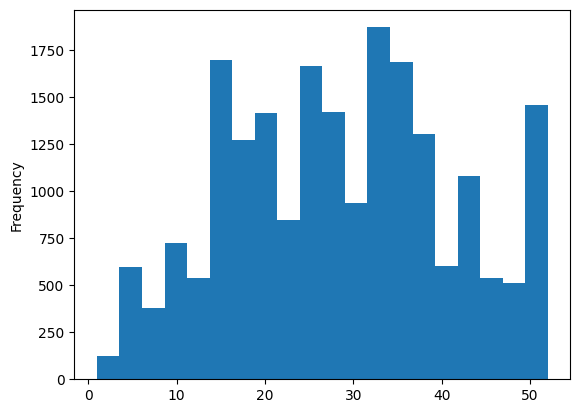

In [ ]:
df['housing_median_age'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

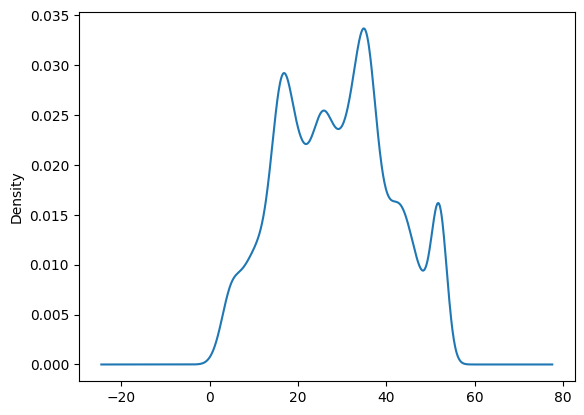

In [ ]:
df['housing_median_age'].plot(kind='kde') # To check how total_rooms.

<Axes: >

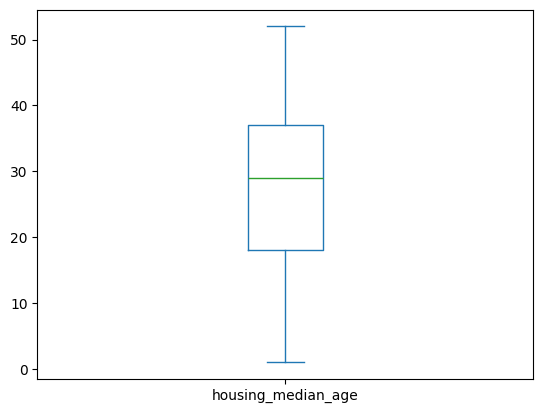

In [ ]:
df['housing_median_age'].plot(kind='box') # To check outlier

**2. total_rooms**

```
1.Based on the total_rooms are having higly skewed
2.There are many outlier
```

In [75]:
print(df['total_rooms'].skew()) # it is highly skewed data

4.147343450632158


<Axes: ylabel='Frequency'>

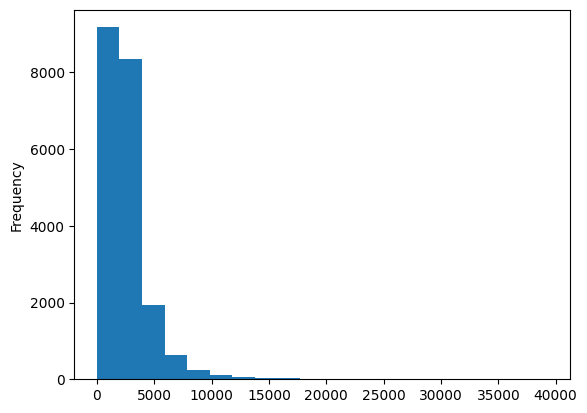

In [74]:
df['total_rooms'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

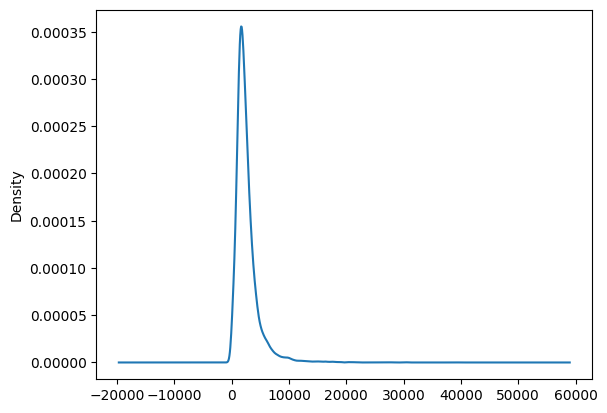

In [76]:
df['total_rooms'].plot(kind='kde') # To check how total_rooms .

<Axes: >

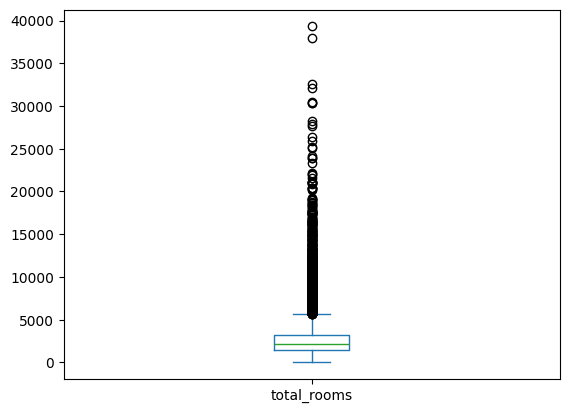

In [77]:
df['total_rooms'].plot(kind='box') # To check outlier has many outliers

**3. total_bedrooms**

```
1.Based on the total_bedrooms are having higly skewed
2.There are many outlier
```

In [110]:
print(df['total_bedrooms'].skew()) # it is highly skewed data


3.4770233756335105


<Axes: ylabel='Frequency'>

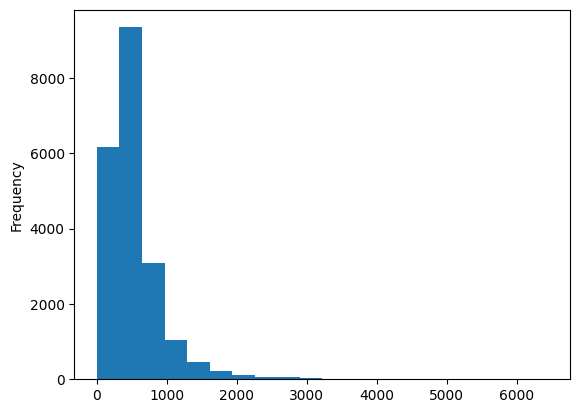

In [111]:
df['total_bedrooms'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

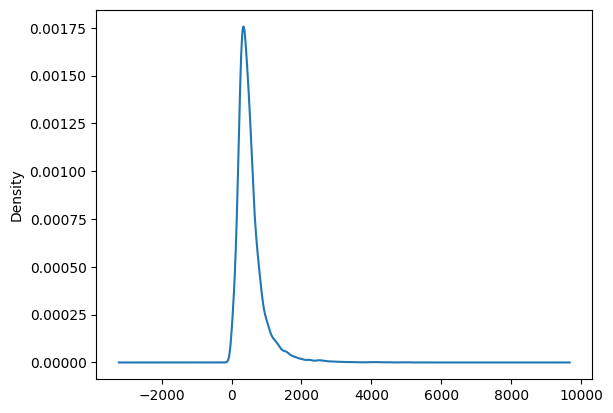

In [112]:
df['total_bedrooms'].plot(kind='kde') # To check how total_bedrooms.

<Axes: >

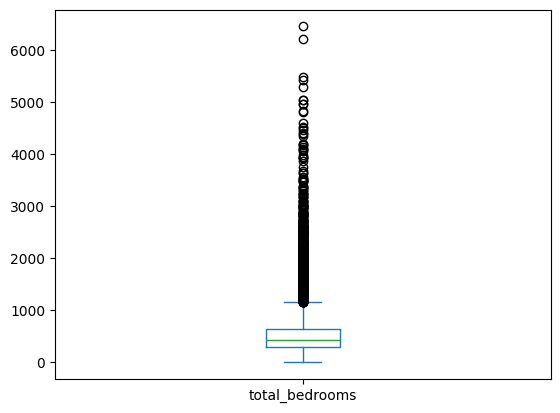

In [113]:
df['total_bedrooms'].plot(kind='box') # To check outlier has many outliers

**4. population**

```
1.Based on the population are having higly skewed
2.There are many outlier
```

In [87]:
print(df['population'].skew()) # it is highly skewed data

4.93585822672712


<Axes: ylabel='Frequency'>

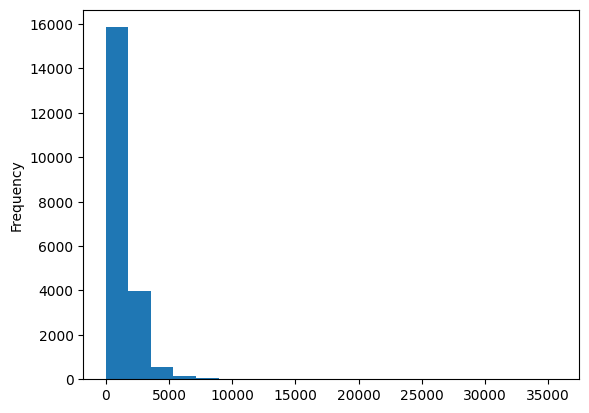

In [88]:
df['population'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

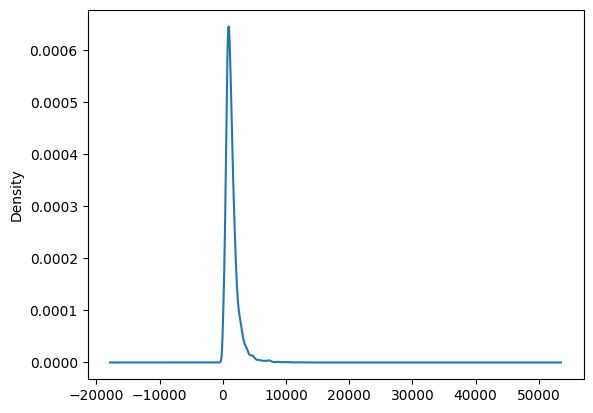

In [89]:
df['population'].plot(kind='kde') # To check how population.

<Axes: >

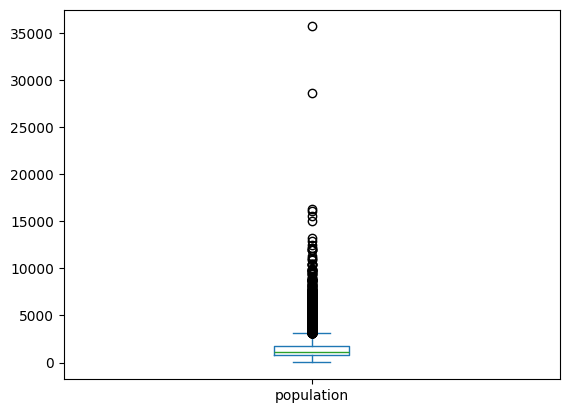

In [85]:
df['population'].plot(kind='box') # To check outlier has many outliers

**5. households**

```
1.Based on the households are having skewed
2.There are many outlier
```

In [118]:
print(df['households'].skew()) # it is skewed data

3.410437711667147


<Axes: ylabel='Frequency'>

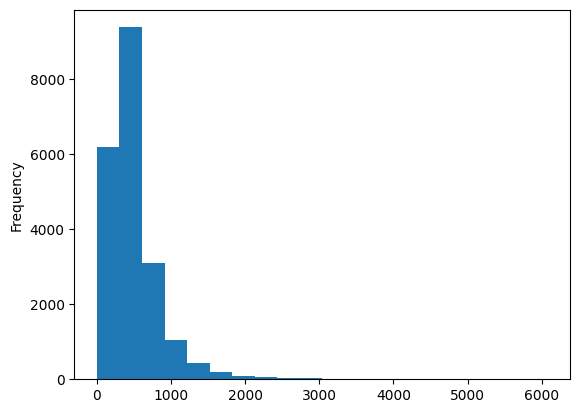

In [119]:
df['households'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

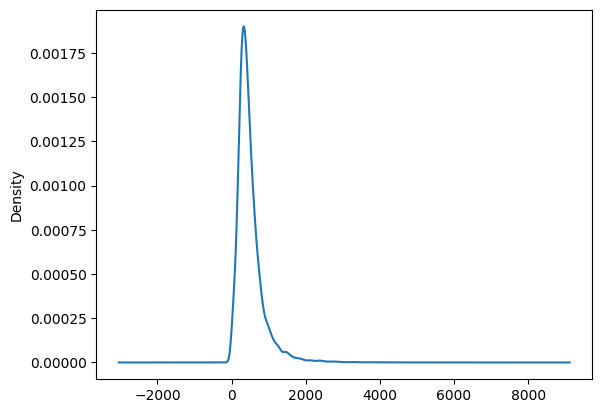

In [120]:
df['households'].plot(kind='kde') # To check how households is distribution.

<Axes: >

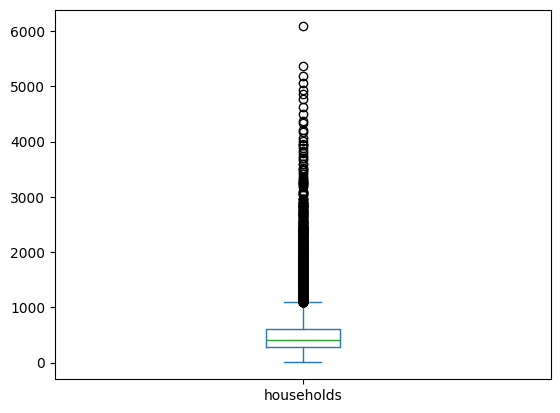

In [121]:
df['households'].plot(kind='box') # To check outlier has many outliers

**6. median_income**

```
1.Based on the median_income are having skewed
2.There are many outlier
```

In [90]:
print(df['median_income'].skew()) # it is skewed data

1.6466567021344465


<Axes: ylabel='Frequency'>

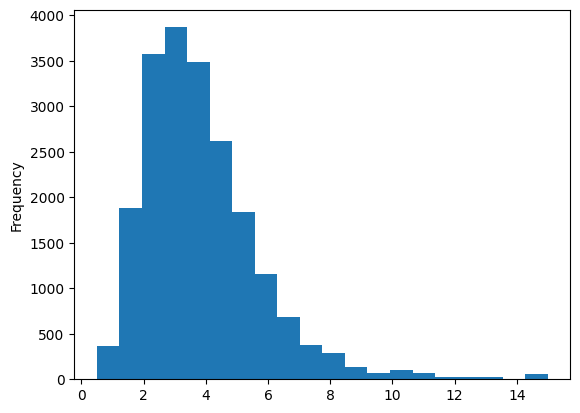

In [94]:
df['median_income'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

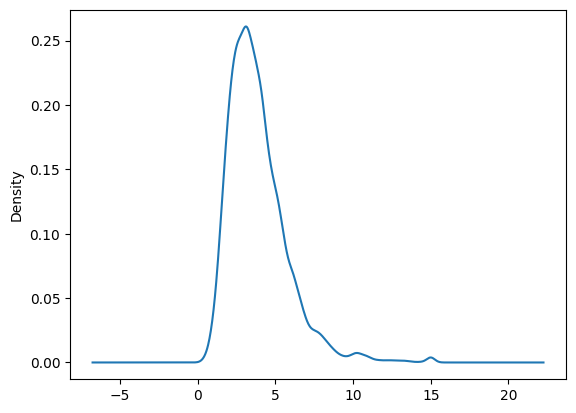

In [98]:
df['median_income'].plot(kind='kde') # To check how median_income is distribution.

<Axes: >

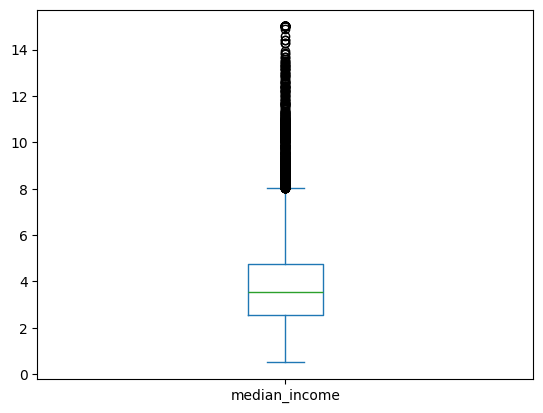

In [99]:
df['median_income'].plot(kind='box') # To check outlier has many outliers

**7. median_house_value**

```
1.Data is not highly skewed
2.Data has many outlier
```

In [101]:
print(df['median_house_value'].skew()) # it is less skewed data

0.9777632739098341


<Axes: ylabel='Frequency'>

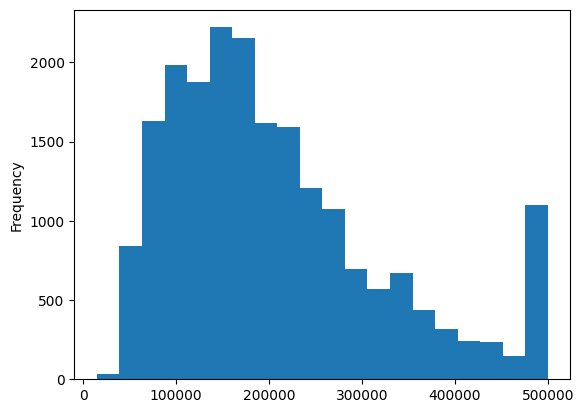

In [102]:
df['median_house_value'].plot(kind='hist' , bins=20) # To visualize the number of median_house_value ther is sudden hypye at last.

<Axes: ylabel='Density'>

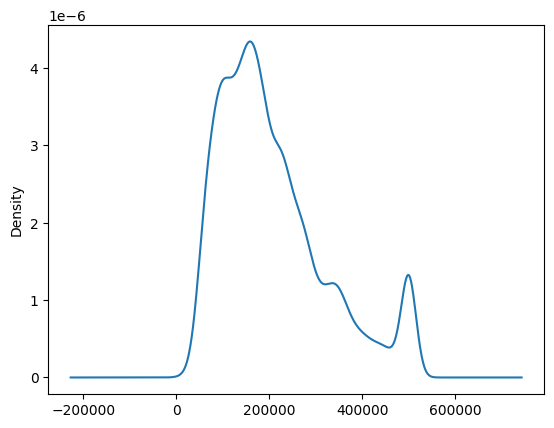

In [104]:
df['median_house_value'].plot(kind='kde') # To check how median_house_value is not distribution.

<Axes: >

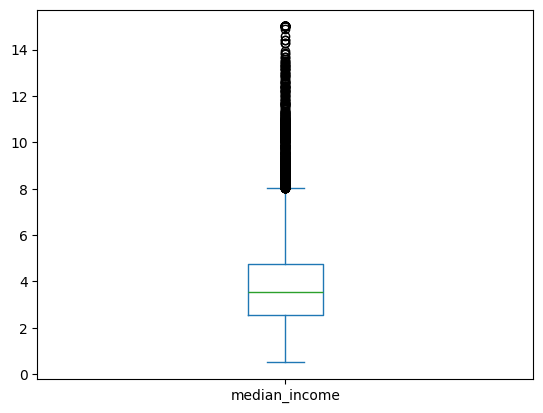

In [105]:
df['median_income'].plot(kind='box') # To check outlier has many outliers

# Result Of Univariate Analysis (Categorical Columns)

**1. ocean_proximity**

    

```
1. Most of people live in <1H OCEAN & INLAND.
2. ISLAND has most les people liveing
```

In [126]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity'>

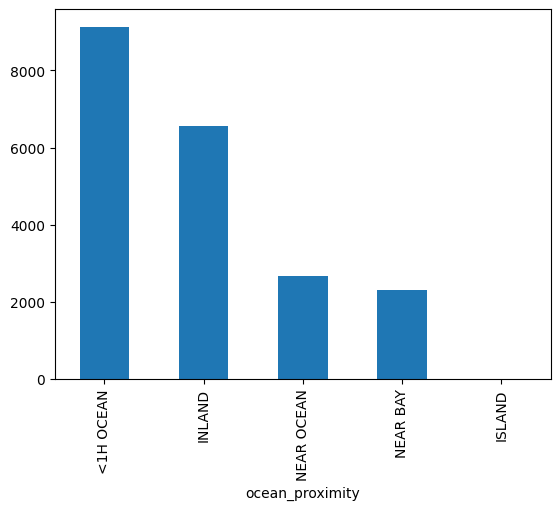

In [127]:
df['ocean_proximity'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

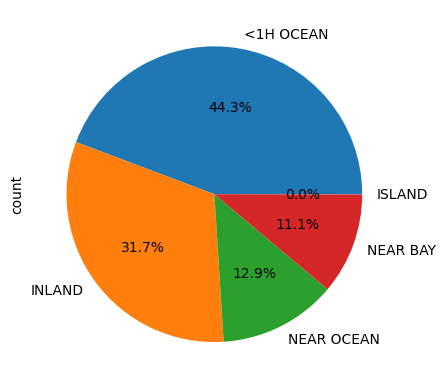

In [128]:
df['ocean_proximity'].value_counts().plot(kind='pie' , autopct='%0.1f%%')

In [129]:
print(df['ocean_proximity'].isnull().sum())

0


# Result Of Bivariate Analysis

## Correlation matrix and heatmap

### Subtask:
Calculate the correlation matrix for the numerical columns and visualize it using a heatmap to understand linear relationships.


**Reasoning**:
Select numerical columns, calculate the correlation matrix, and generate a heatmap to visualize correlations.



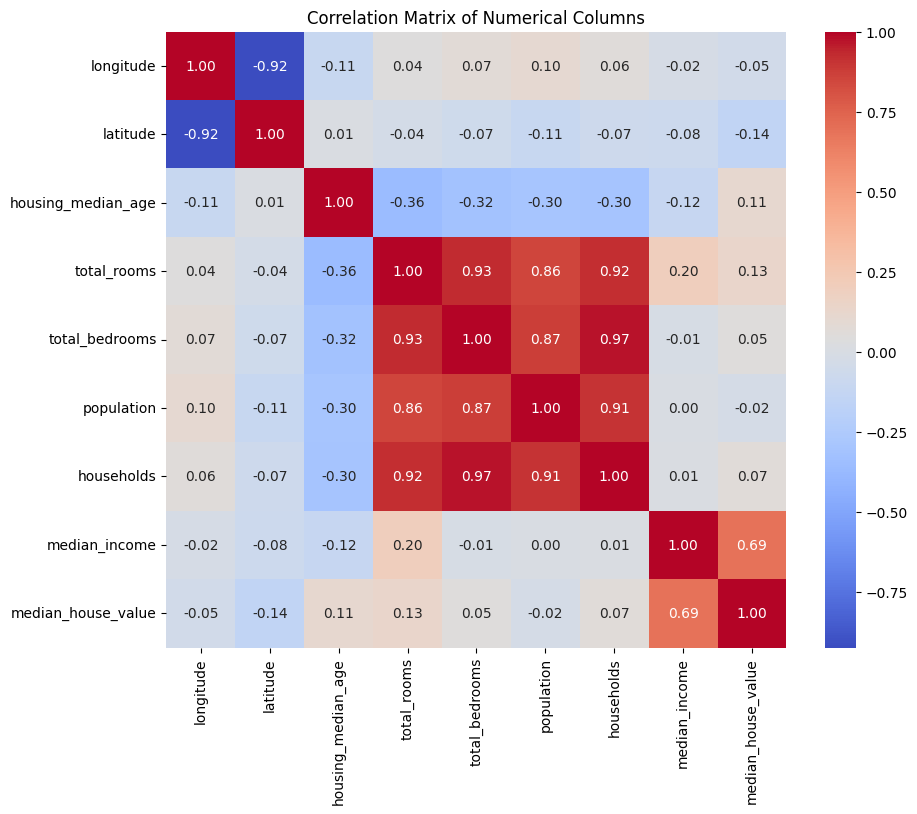

In [130]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## Scatter plots for numerical variables

### Subtask:
Generate scatter plots for pairs of numerical variables to visualize their relationships.


**Reasoning**:
Iterate through pairs of numerical columns and create scatter plots to visualize their relationships.



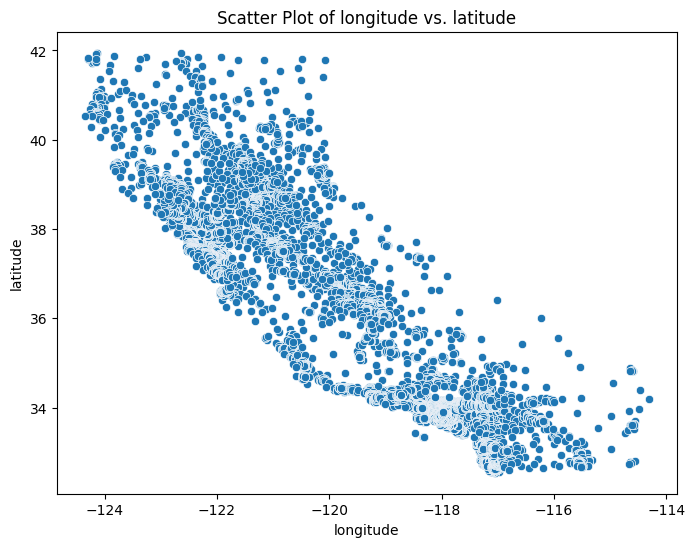

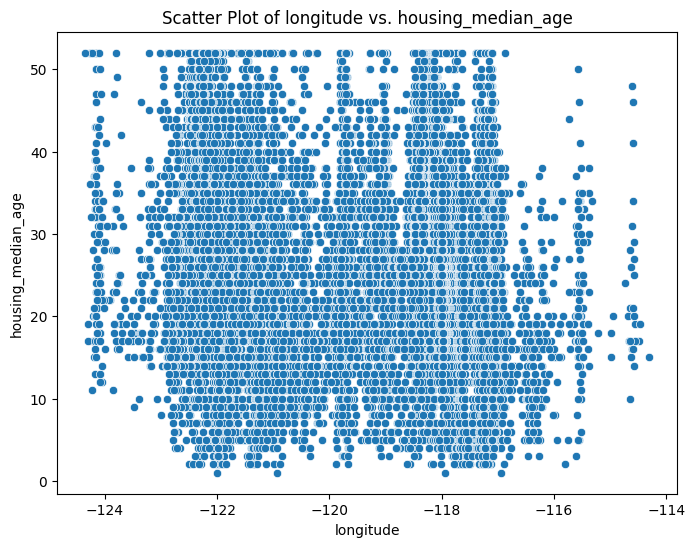

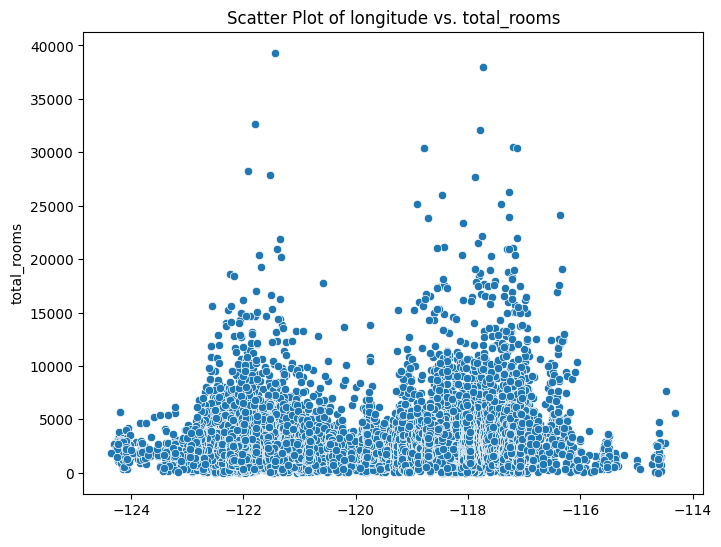

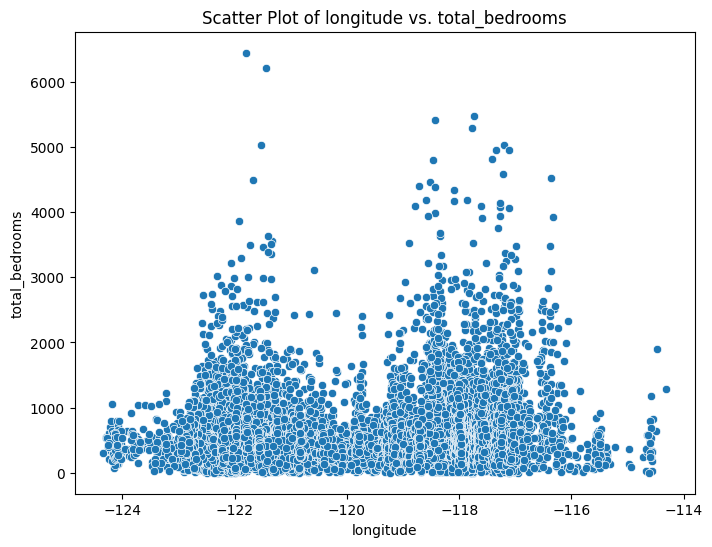

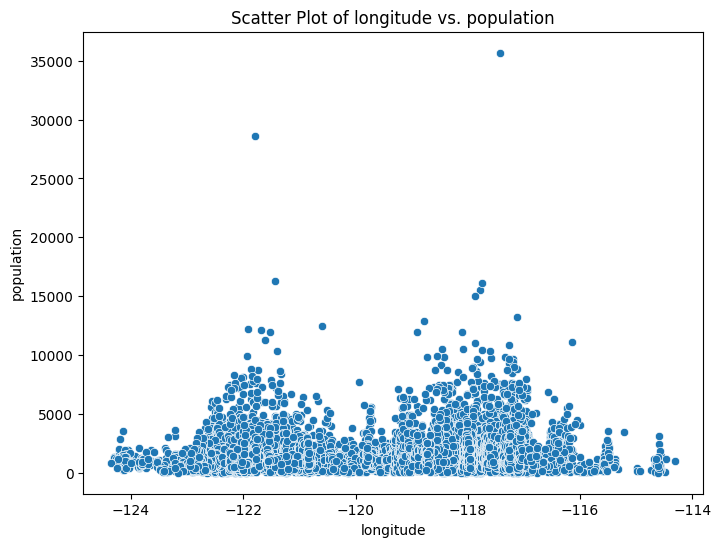

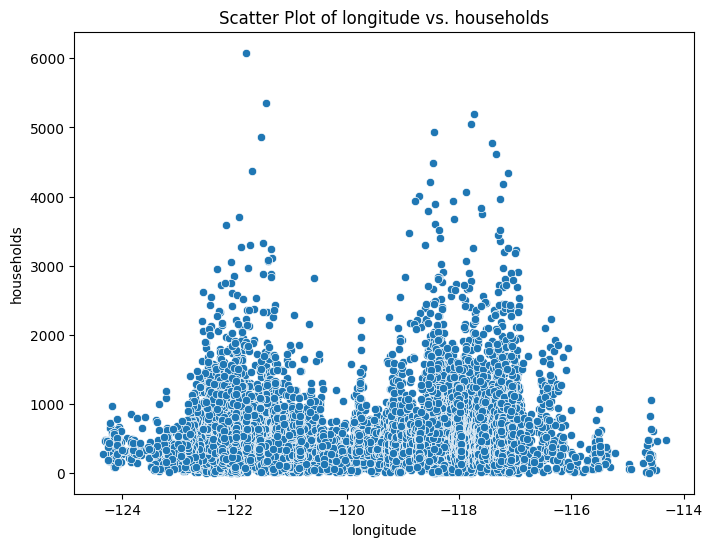

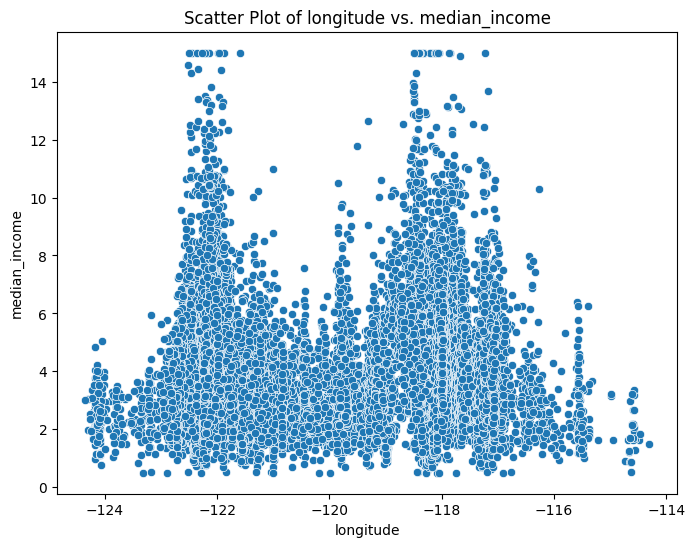

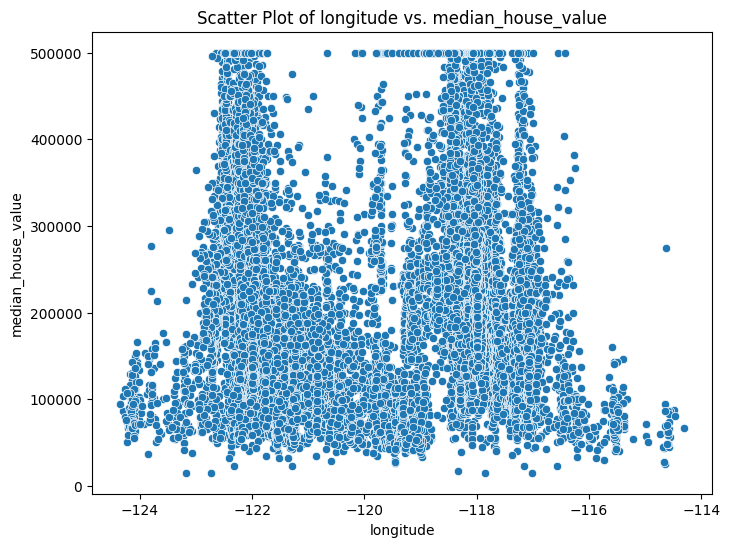

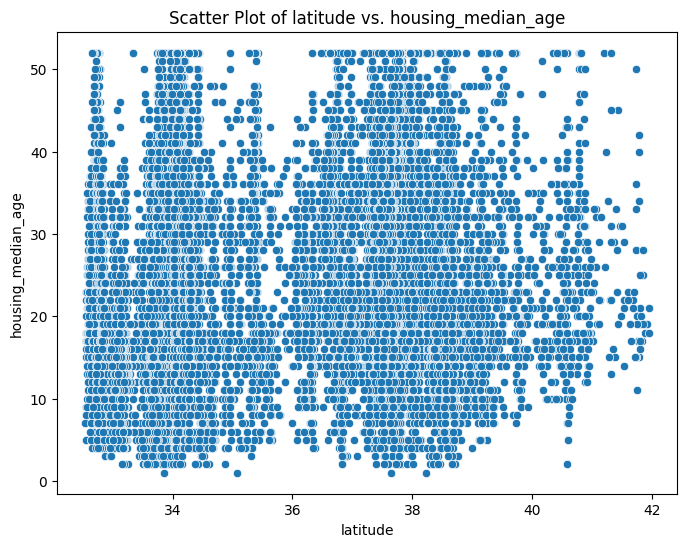

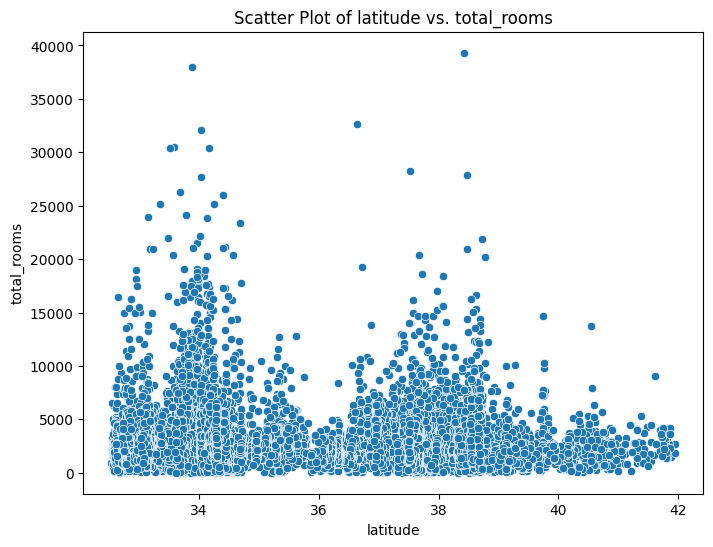

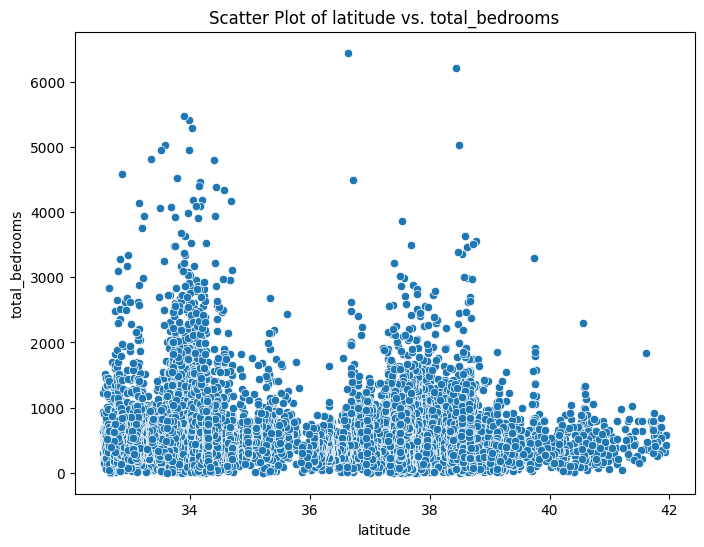

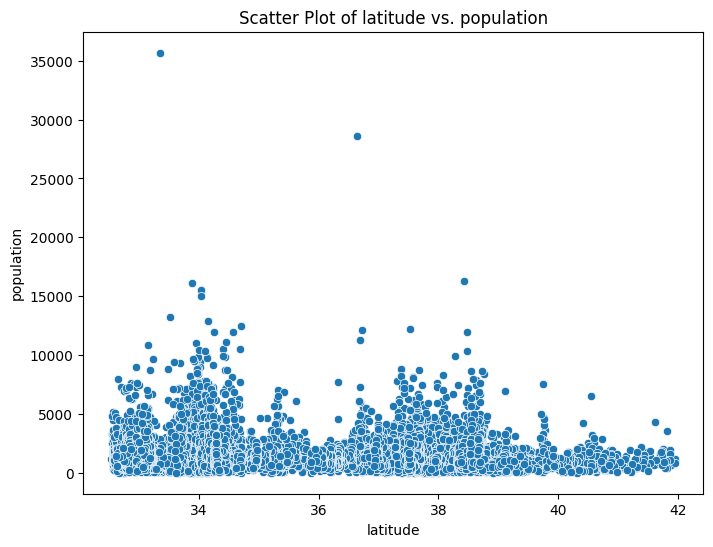

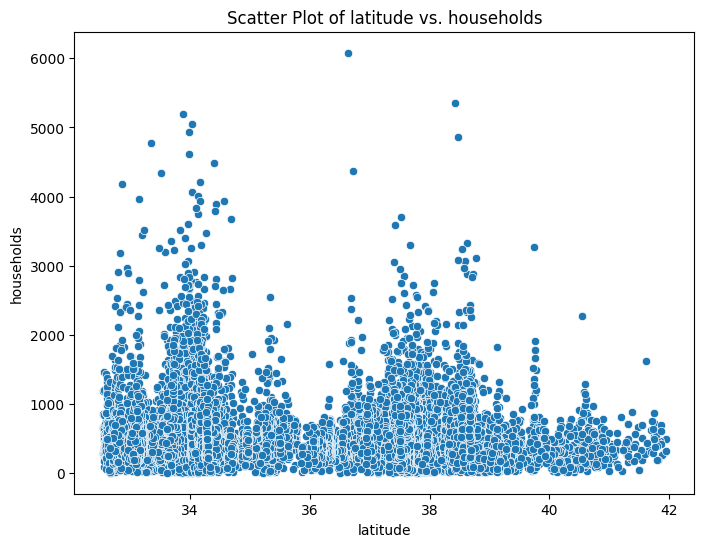

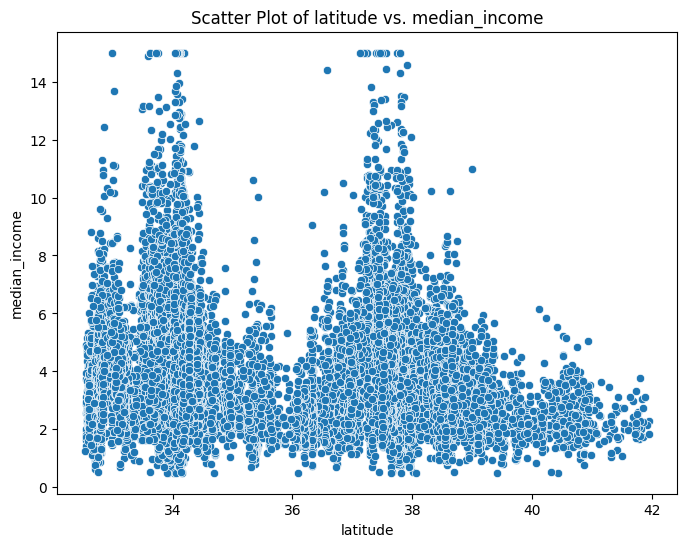

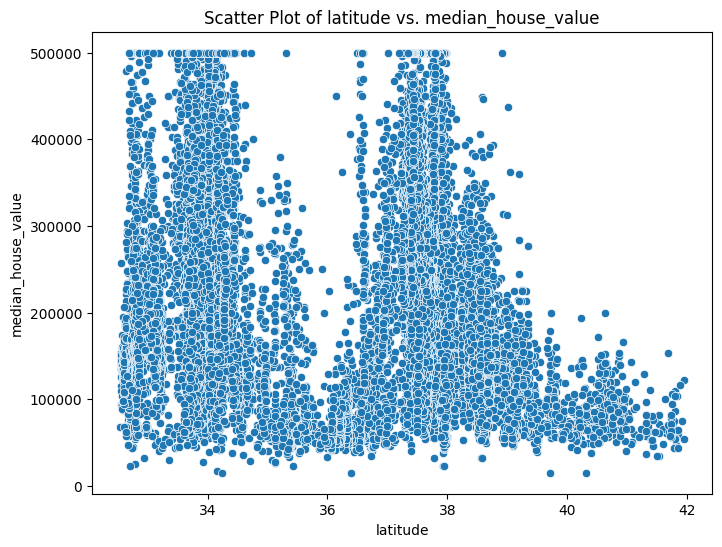

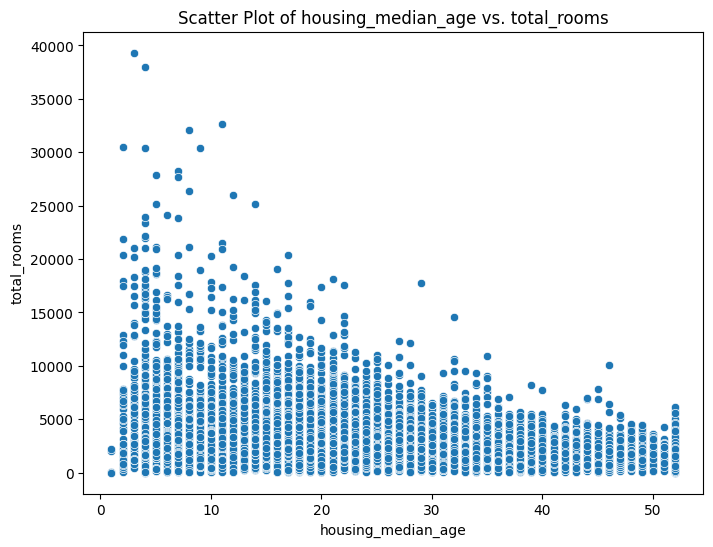

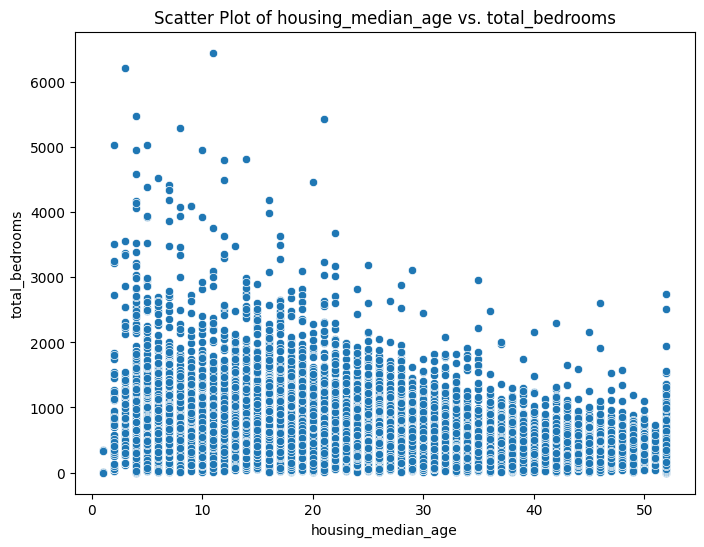

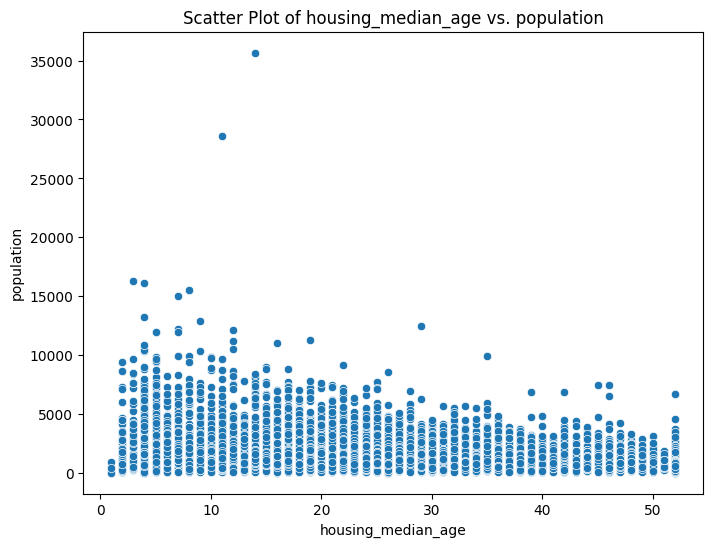

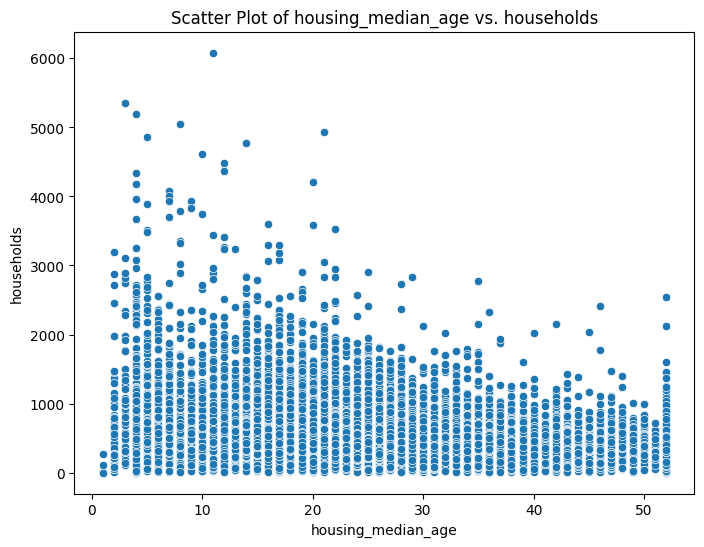

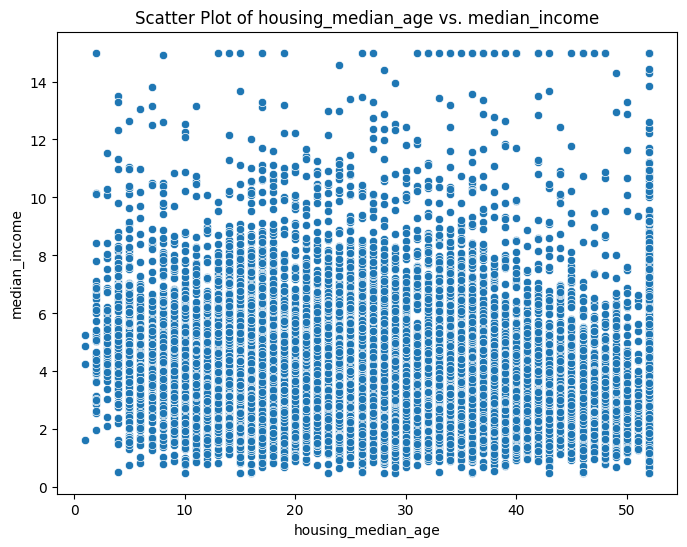

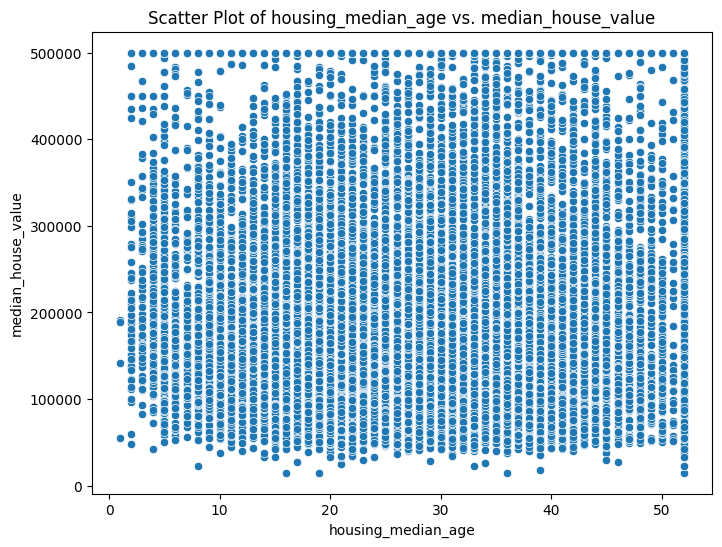

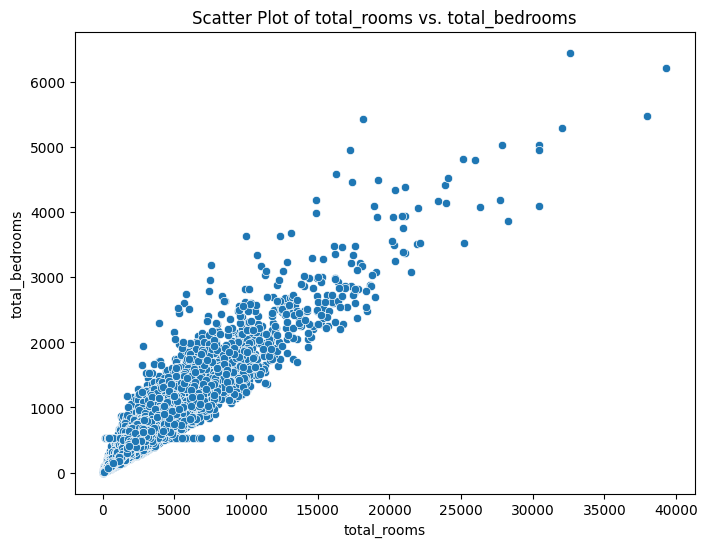

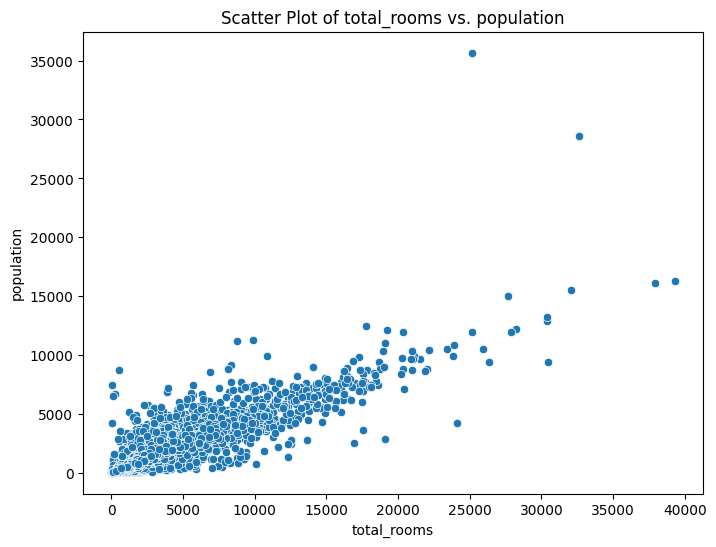

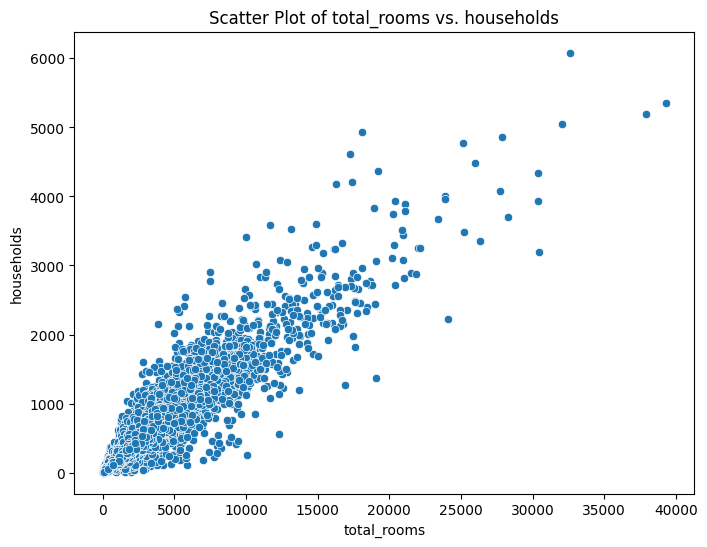

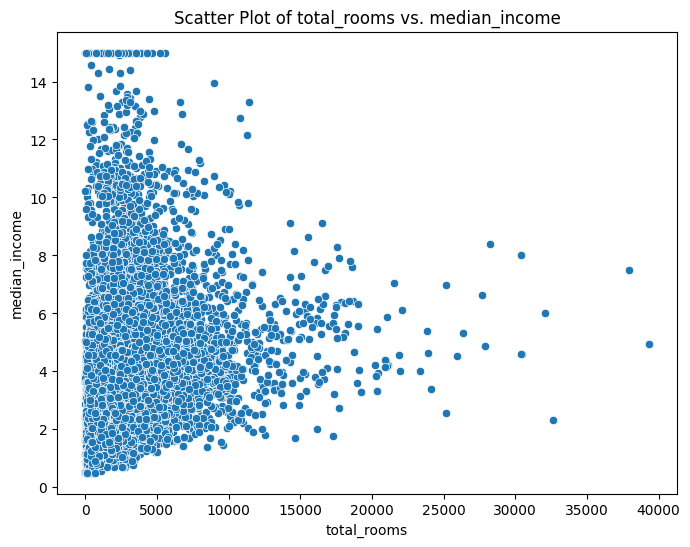

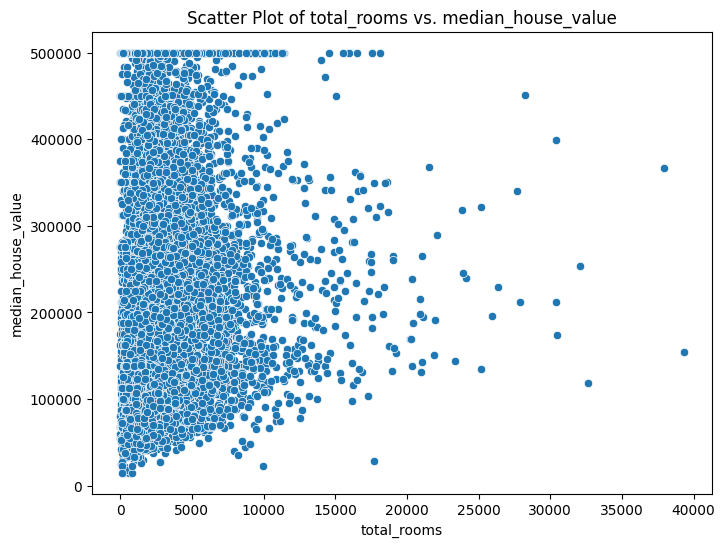

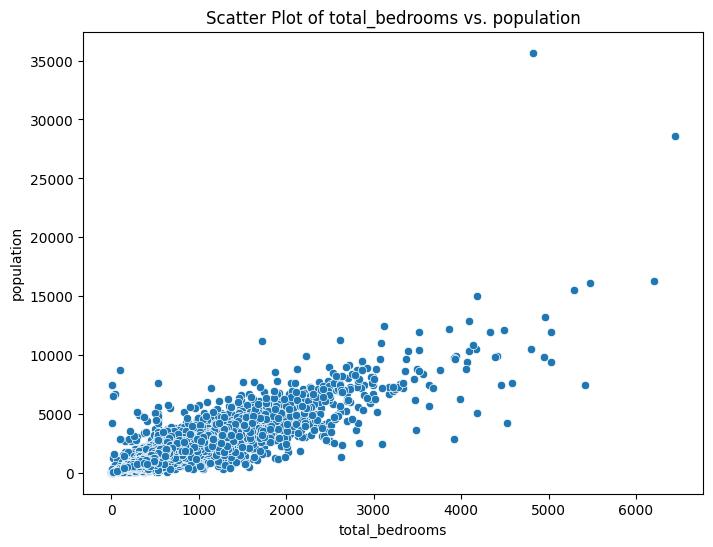

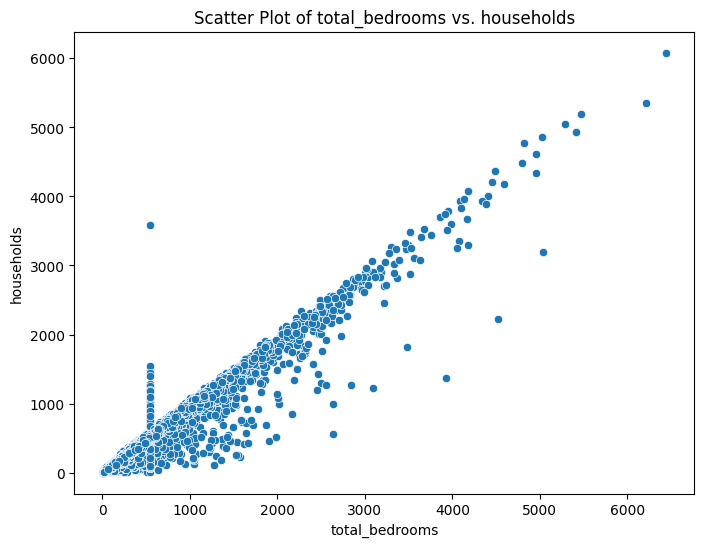

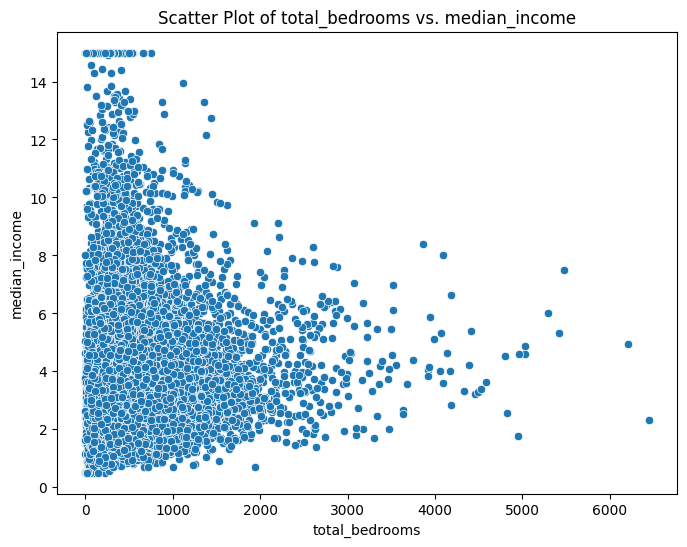

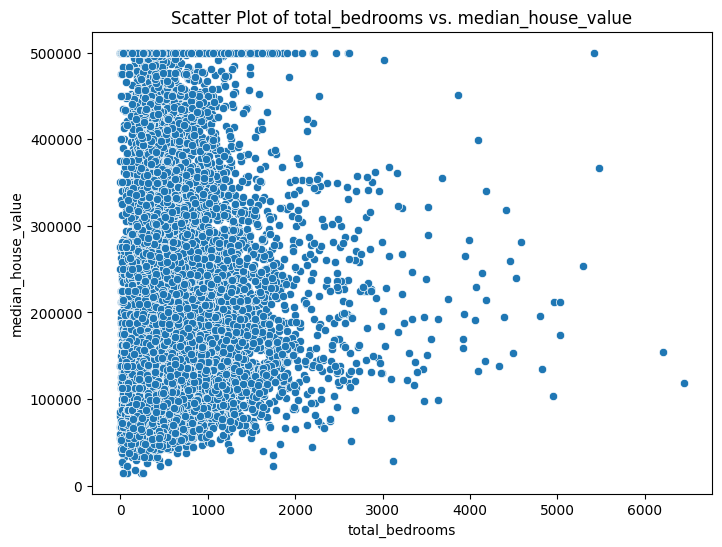

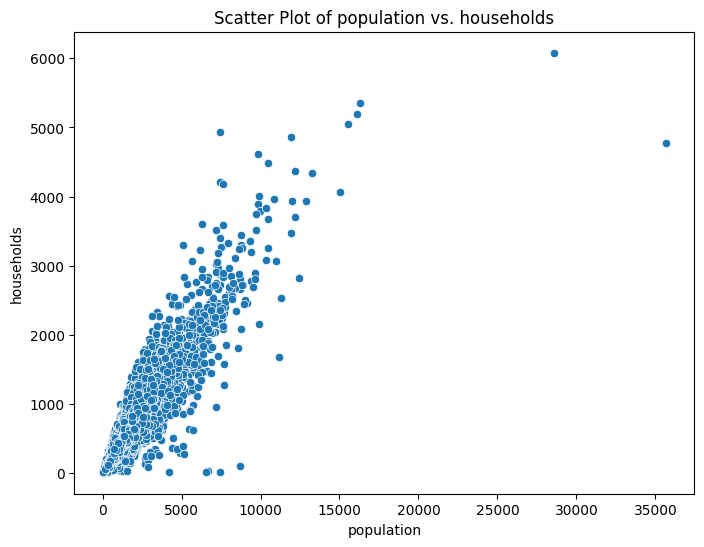

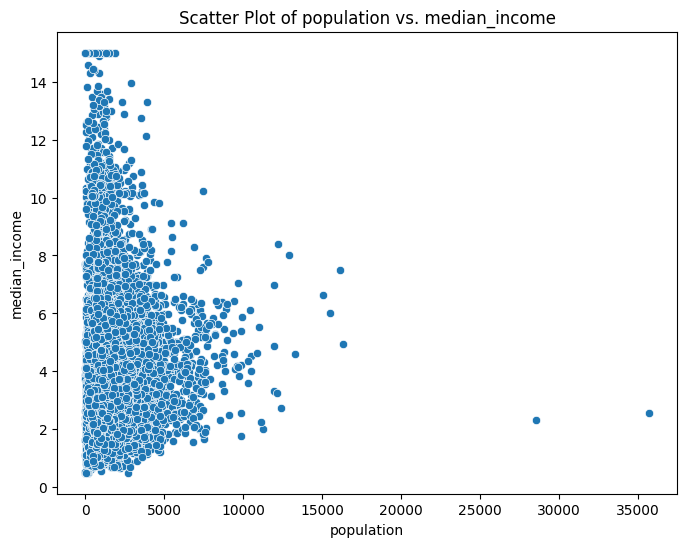

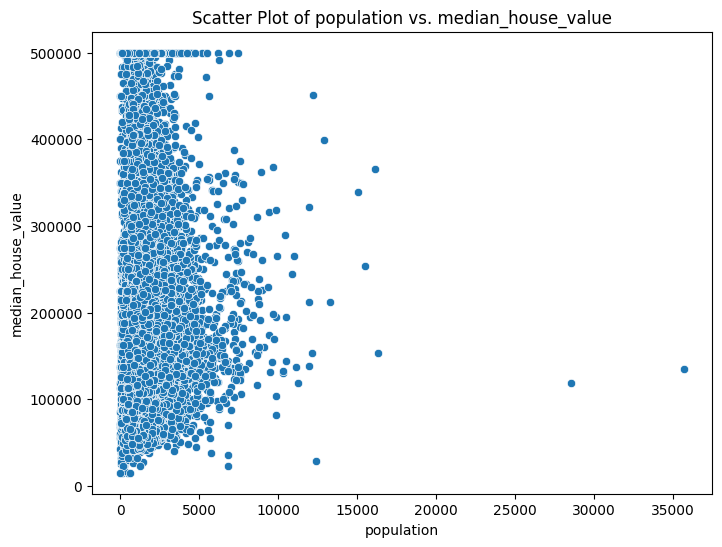

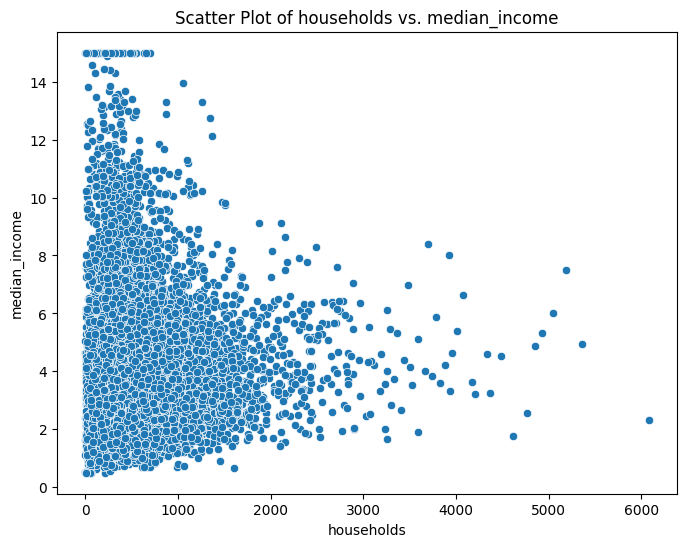

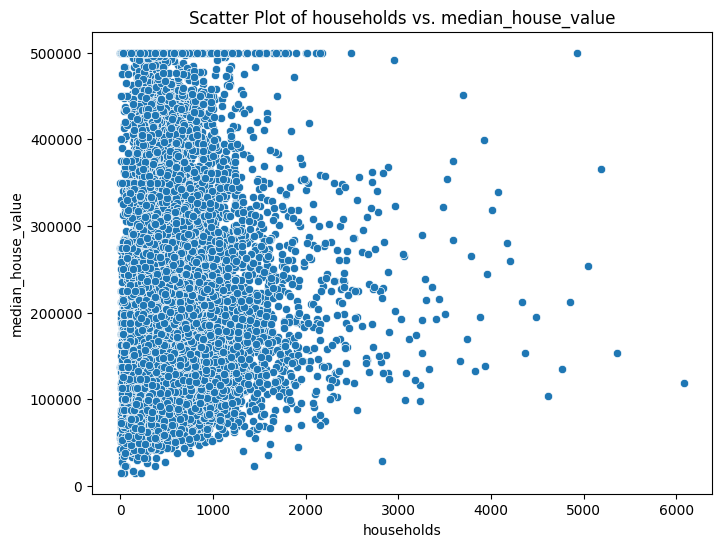

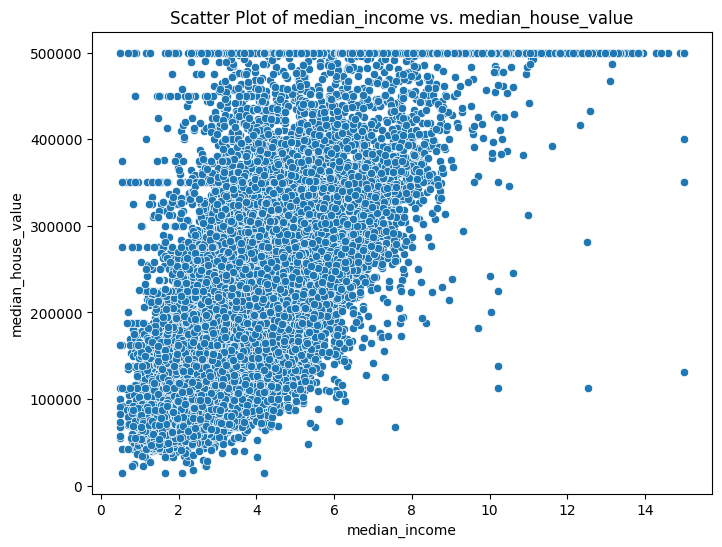

In [131]:
numerical_cols = df.select_dtypes(include=np.number).columns

for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        col1 = numerical_cols[i]
        col2 = numerical_cols[j]
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=col1, y=col2)
        plt.title(f'Scatter Plot of {col1} vs. {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

## Box plots or violin plots for categorical vs. numerical variables

### Subtask:
Create box plots or violin plots to examine the relationship between the categorical `ocean_proximity` column and the numerical columns.


**Reasoning**:
Identify numerical columns and iterate through them to create box plots against the categorical 'ocean_proximity' column to visualize their relationships.



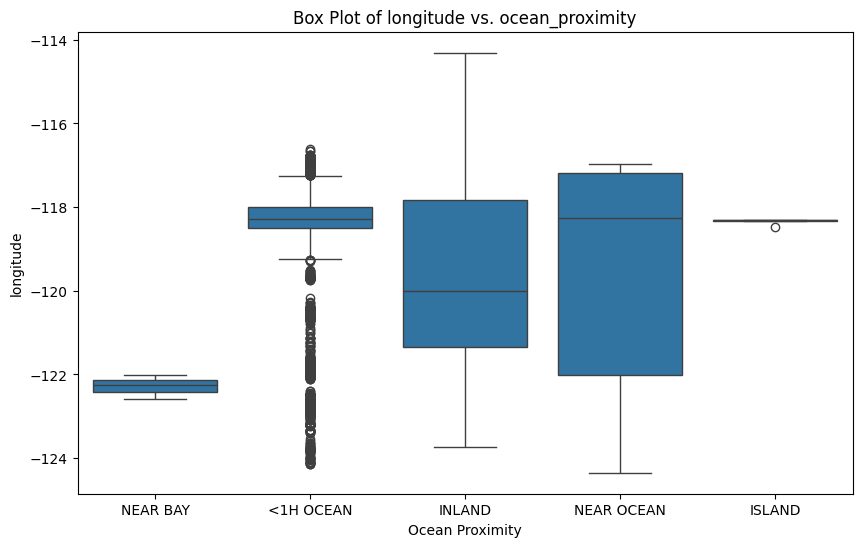

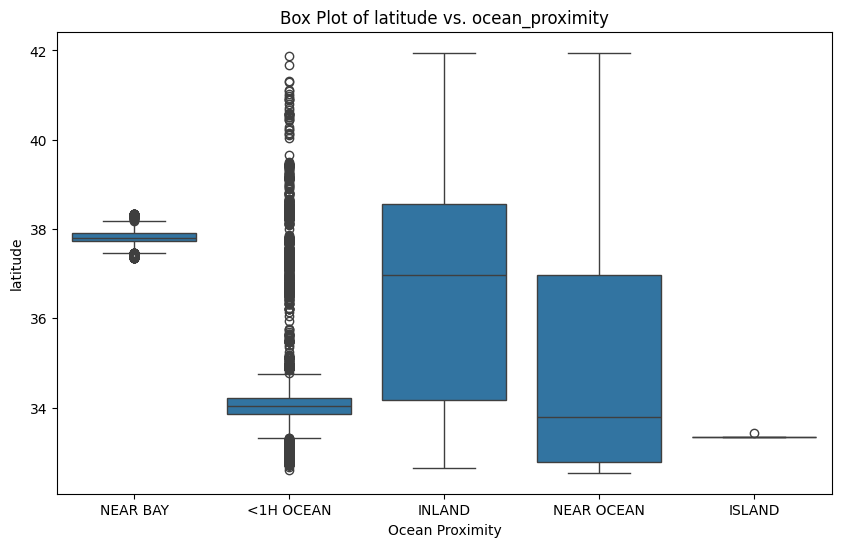

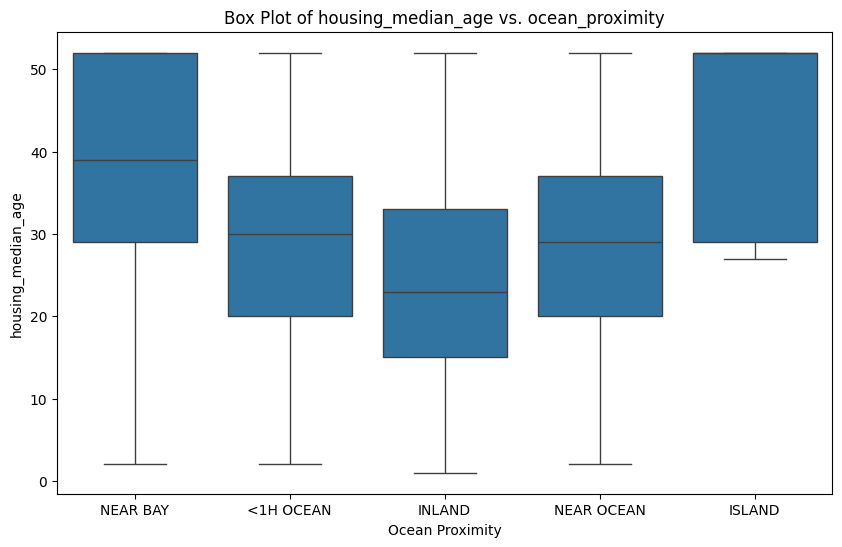

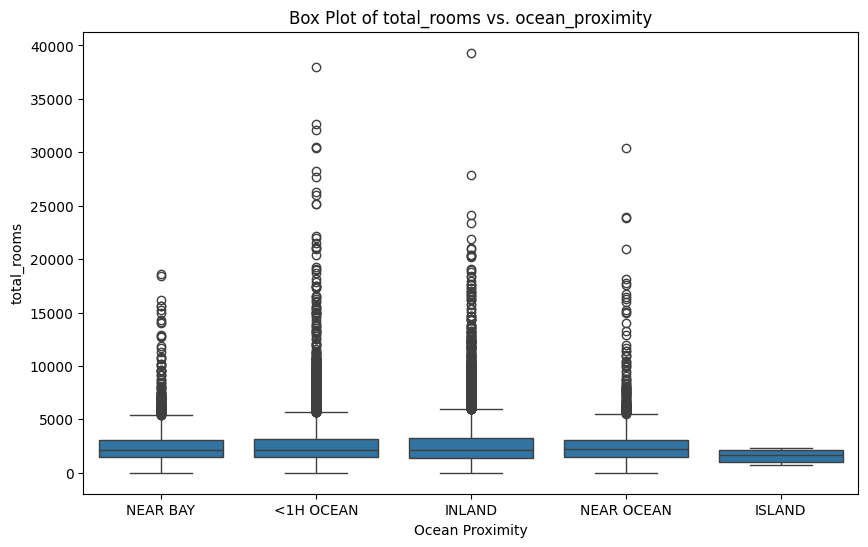

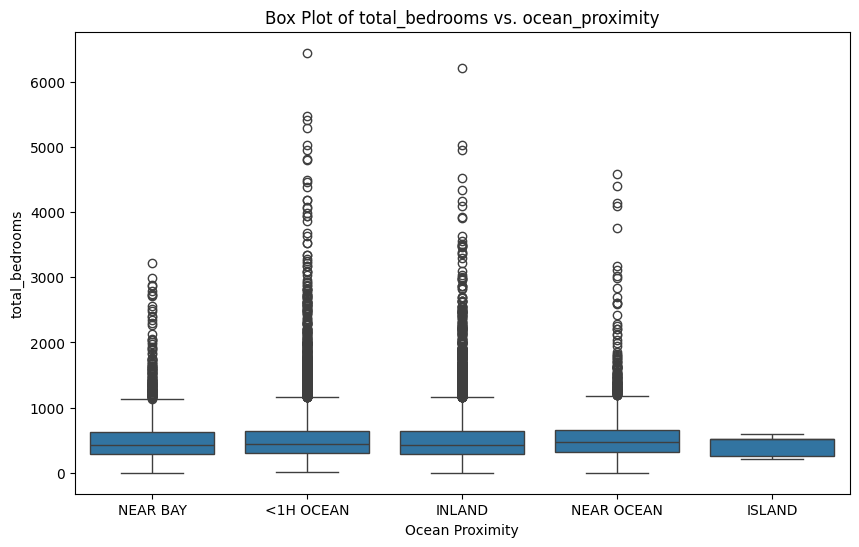

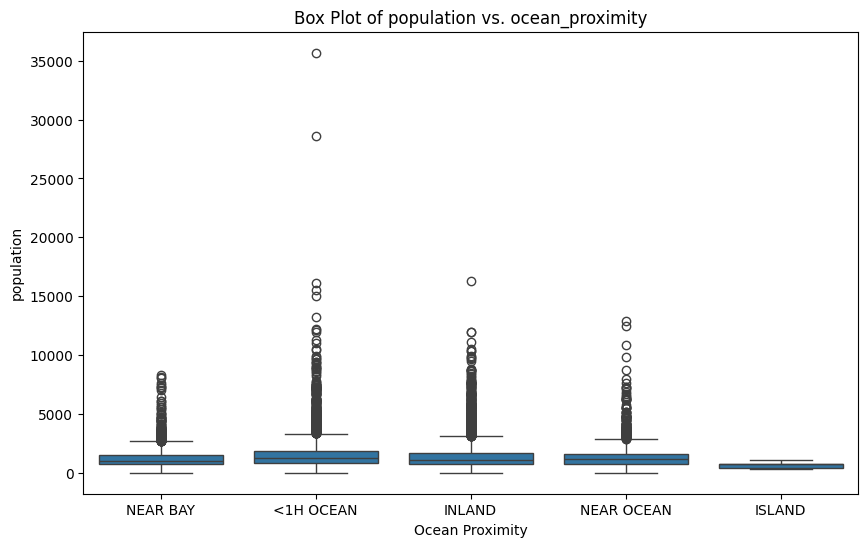

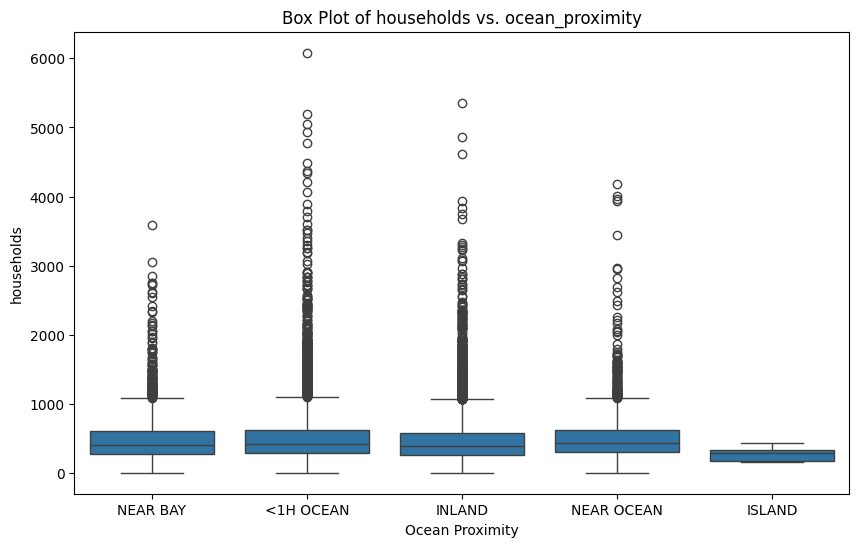

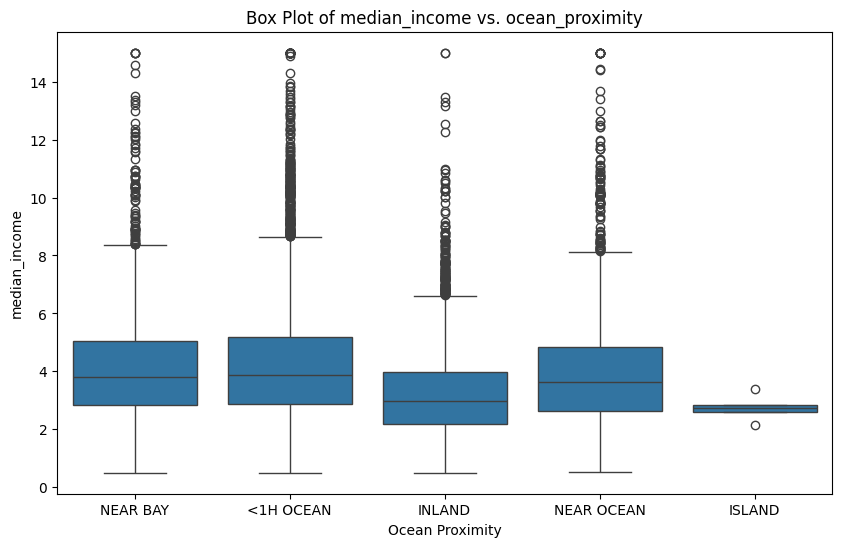

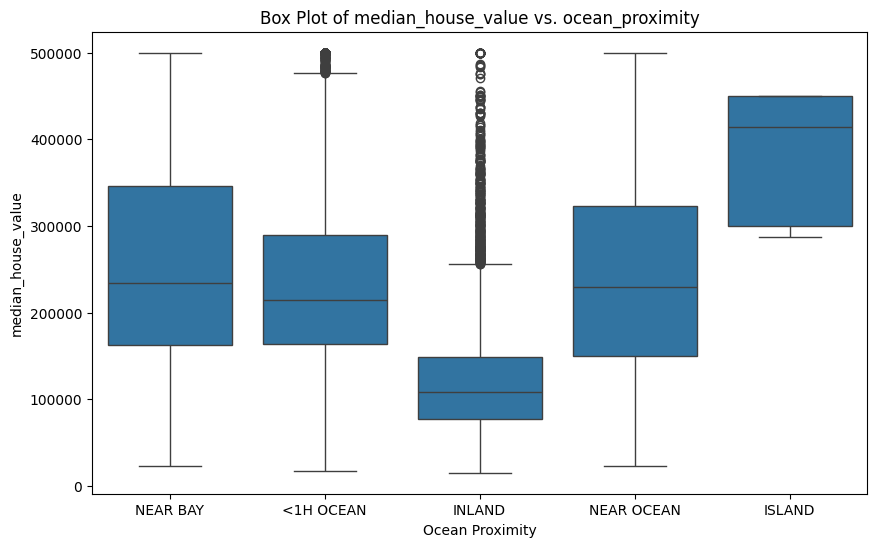

In [132]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='ocean_proximity', y=col)
    plt.title(f'Box Plot of {col} vs. ocean_proximity')
    plt.xlabel('Ocean Proximity')
    plt.ylabel(col)
    plt.show()

## Analyze relationships

### Subtask:
Interpret the visualizations to identify strong correlations or interesting patterns between variables.


**Reasoning**:
Interpret the previously generated visualizations to identify strong correlations and patterns, then summarize the findings.



# Interpretation of  Analysis

---

## Correlation Matrix and Heatmap Analysis

**Key Observations:**

- There is a strong positive correlation between `total_rooms`, `total_bedrooms`, `population`, and `households`.  
  This is expected since these features describe the size and occupancy of a block.
- `median_income` shows a moderate positive correlation with `median_house_value` (~0.69),  
  suggesting that higher income areas tend to have higher house values.
- `housing_median_age` has a weak positive correlation with `median_house_value` (~0.11).
- `latitude` and `longitude` show a strong negative correlation (~-0.92), which is expected as they represent geographical coordinates.
- Other correlations are relatively weak.

---

## Scatter Plot Analysis

**Observations:**

- Scatter plots for strongly correlated pairs like `total_rooms` vs `total_bedrooms` and `population` vs `households` show clear linear trends, confirming the positive correlations seen in the heatmap.
- The scatter plot of `median_income` vs `median_house_value` shows a positive relationship, but with wide spread, indicating that income is a major factor but not the only one influencing house prices.
- The scatter plots of `latitude` and `longitude` reveal clear geographic distribution patterns.
- Scatter plots of weakly correlated pairs show no distinct linear relationship, as expected.

---

## Box/Violin Plot Analysis (ocean_proximity vs Numerical Variables)

**Observations:**

- `median_house_value` varies significantly with `ocean_proximity`:  
  - `NEAR BAY` and `<1H OCEAN` tend to have higher median values and wider spread (more outliers).  
  - `INLAND` generally shows lower median values.  
  - `ISLAND` has very high medians, but with only 5 data points, not statistically reliable.
- `median_income` also differs across `ocean_proximity`, with `NEAR BAY` and `<1H OCEAN` generally having higher incomes.
- `total_rooms`, `total_bedrooms`, `population`, and `households` distributions differ across categories, likely reflecting different housing types and densities.
- `housing_median_age` shows some variation — `NEAR BAY` may have older houses on average.

---

## Summary of Significant Relationships and Patterns

- `median_income` has the strongest linear correlation with `median_house_value`.
- `latitude` and `longitude` are strongly correlated, as expected.
- `ocean_proximity` is a key categorical variable influencing:
  - `median_house_value`
  - `median_income`
  - Housing scale features (`total_rooms`, `total_bedrooms`, `population`, `households`)
- Features representing block size (`total_rooms`, `total_bedrooms`, `population`, `households`) are highly intercorrelated.


### Data Analysis Key Findings

*   There is a strong positive correlation (around 0.69) between `median_income` and `median_house_value`, indicating that areas with higher median incomes tend to have higher median house values.
*   Features related to the size and occupancy of a block (`total_rooms`, `total_bedrooms`, `population`, `households`) are strongly positively correlated with each other.
*   `latitude` and `longitude` show a strong negative correlation (around -0.92), which is expected given they are geographical coordinates.
*   The categorical variable `ocean_proximity` has a significant impact on `median_house_value` and `median_income`. Areas labeled 'NEAR BAY' and '<1H OCEAN' generally show higher median house values and incomes compared to 'INLAND'.

### Insights or Next Steps

*   `median_income` and `ocean_proximity` appear to be important predictors for `median_house_value` and should be strongly considered in subsequent modeling steps.
*   Given the high inter-correlation among size-related features (`total_rooms`, `total_bedrooms`, `population`, `households`), dimensionality reduction or feature engineering (e.g., calculating ratios) might be beneficial to avoid multicollinearity in modeling.
